<a href="https://colab.research.google.com/github/SteelworkerDB/ML_W2/blob/main/Ejercicio_Metricas_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [13]:
df.describe()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


**1. Correlación**

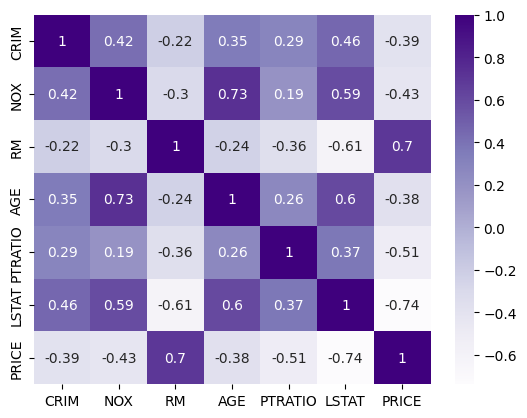

In [3]:
import seaborn as sns #PARA ESTILOS DE VISUALIZACION
corr=df.corr()
sns.heatmap(corr,cmap='Purples', annot=True);

**2. Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).**

In [4]:
y = df['PRICE']
X =df[['RM','LSTAT','PTRATIO']]

**3. Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

**4. Instancien el modelo y ajústenlo al conjunto de entrenamiento.**

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [7]:
train_preds = reg.predict(X_train)

test_preds = reg.predict(X_test)


**5. Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?**

In [8]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
r2_train = r2_score(y_train, train_preds)
print(r2_train)
r2_test = r2_score(y_test, test_preds)
print(r2_test)

0.6877966145058925
0.6331590458194678


*Existe una pequeña diferencia entre los valores de R2 de entrenamiento y prueba. Sin embargo la regresión lineal no parece ser un buen modelo ya que R2 está bastante alejado de 1 en ambos casos*

**6. Evalúen el modelo usando el error absoluto medio (EAM).**

In [10]:
mae_train = mean_absolute_error(y_train, train_preds)
print(mae_train)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_test)

3.714054057158005
3.3918448293813968


*Existe una pequeña diferencia entre los valores de R2 de entrenamiento y prueba.  El error absoluto medio está entre 3 y 4, menos de una desviación estándar del precio.*

**7. Evalúen el modelo usando el error cuadrático medio (ECM).  .**

In [11]:
mse_train = mean_squared_error(y_train, train_preds)
print(mse_train)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_test)

27.68673681796949
25.688824196675952


*Existe una pequeña diferencia entre los valores de R2 de entrenamiento y prueba.*

**8. Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.**

In [12]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_test)

5.261818774717492
5.068414367104958


*Existe una pequeña diferencia entre los valores de R2 de entrenamiento y prueba. Este valor todavía está bajo la desviación estándar del precio, por lo que indica que el modelo sí puede ser útil, mientras se tome en consideración un rango de precios aceptables en la predicción del modelo.*